In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
len(y_train)

60000

In [7]:
len(y_test)

10000

In [8]:
# So, we have 70,000 observations in total train test combined

In [9]:
X_train[0].shape # 28 x 28 pixels images

(28, 28)

In [10]:
X_train[0] # each pixel has its own corresponding array 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

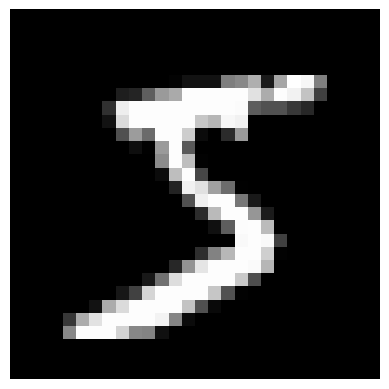

In [11]:
# displaying one image from the dataset
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [12]:
y_train[0] # cross-checked that X_train[0] image matches with the
           # y_train[0] corresponding label

5

In [13]:
# We'll Normalize the pixel values to be in range of 0-1 by dividing the
# pixel values with 255 which is the largest pixel value

X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train[0] # now we can see that the pixel values are normalized actually
           # we do this normalization of the pixel values to imporve the 
           # performance of the network (and this normalization technique
           # works on all sorts of data not only image data)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_train_flattened = X_train.reshape(len(X_train) , 28 * 28)
X_test_flattened = X_test.reshape(len(X_test) , 28 * 28)


# we flattened X_train which has 28 x 28 dimentional matrices as 
# observations into having observations which are single dimentional array
# with 784 elements (which is 28 * 28)


In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train.shape # just for comparision what we've done by flattening

(60000, 28, 28)

In [21]:
# (60000, 28, 28) ----> (60000, 784)
#         '----'                '--'
#            ^                    ^
#            |____________________|
#          28 * 28     =         784

In [22]:
# lets look into X_train_flattened's observations
X_train_flattened[0] # now we have one dimentional array having 784 
                     # elements insted of 28 x 28 matrix

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Now we'll try building Neural Networks

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9263


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9269


[0.266147255897522, 0.9269000291824341]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.8377684e-02, 3.3509846e-07, 5.4947838e-02, 9.6564746e-01,
       2.0594010e-03, 1.3312364e-01, 1.3305083e-06, 9.9982780e-01,
       7.7368952e-02, 6.5436178e-01], dtype=float32)

In [26]:
np.argmax(y_predicted[0])

7

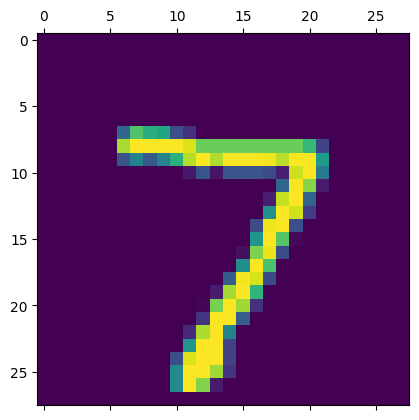

In [27]:
plt.matshow(X_test[0])

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [32]:
y_predicted

array([[2.8377684e-02, 3.3509846e-07, 5.4947838e-02, ..., 9.9982780e-01,
        7.7368952e-02, 6.5436178e-01],
       [3.1204078e-01, 6.0058157e-03, 9.9921757e-01, ..., 9.5573994e-13,
        1.5735154e-01, 2.3957689e-09],
       [4.1771514e-04, 9.9262697e-01, 6.6270453e-01, ..., 1.5157457e-01,
        3.9248466e-01, 5.1118366e-02],
       ...,
       [4.9939363e-06, 6.0002722e-06, 1.0124722e-03, ..., 2.7629942e-01,
        4.1958717e-01, 7.4128622e-01],
       [1.2284817e-04, 1.6907380e-04, 1.9791265e-04, ..., 5.5826604e-05,
        6.1948717e-01, 9.7330863e-05],
       [9.9679958e-03, 4.5513307e-10, 1.8513063e-01, ..., 1.6324213e-08,
        1.3491118e-04, 4.7549435e-07]], dtype=float32)

In [31]:
y_predicted_labels
# these are 10 probabilities of prediction being one of those label 
# we'll fetch the np.argmax of them to get the most probable resultant 
# prediction labels of each observation using list comphrension

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    7,    6,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,    9,  926,   17,    9,    5,   11,   10,   36,    4],
       [   1,    0,   19,  928,    0,   22,    2,   11,   19,    8],
       [   2,    1,    4,    2,  925,    0,    9,    4,    7,   28],
       [   7,    3,    3,   34,    8,  783,   13,    6,   28,    7],
       [  11,    3,    8,    1,    8,   17,  906,    2,    2,    0],
       [   1,    5,   22,    7,    8,    0,    0,  955,    2,   28],
       [   9,   10,    7,   23,   10,   30,    8,   13,  858,    6],
       [  11,    7,    1,   10,   32,    8,    0,   25,    3,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

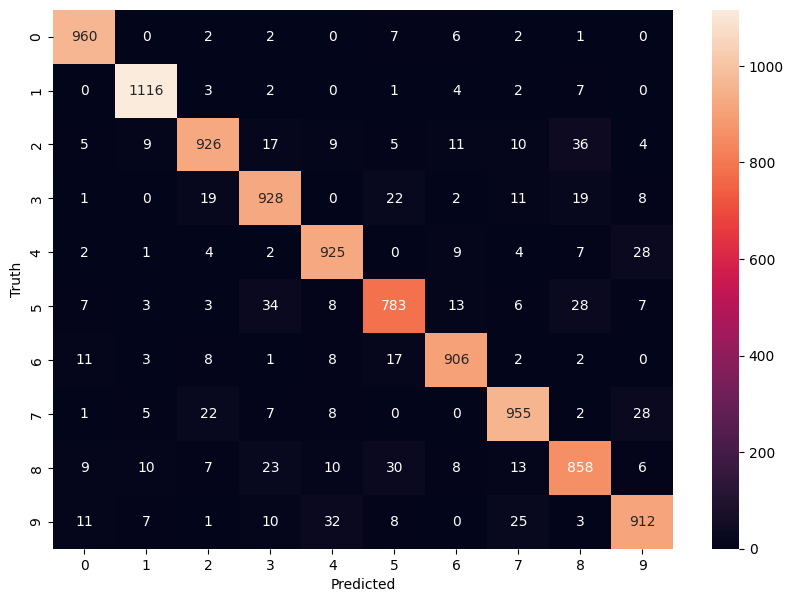

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### We'll try and make some changes in the network
### Adding a hidden layer

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9839


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9764


[0.07566680014133453, 0.9764000177383423]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

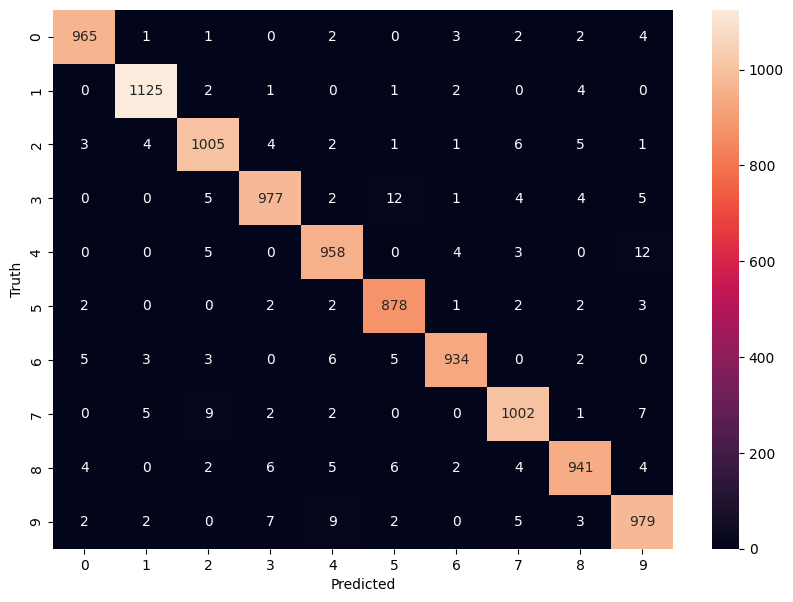

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9765


[0.08040637522935867, 0.9764999747276306]

In [44]:
y_predicted = model.predict(X_test)
y_predicted[7]

313/313 [==============================] - 0s 1ms/step


array([3.6561058e-12, 1.9327933e-09, 1.5507962e-09, 8.1185048e-04,
       4.7691626e-04, 3.4484808e-06, 2.4788574e-15, 4.9617743e-06,
       1.1808558e-08, 9.9870276e-01], dtype=float32)

In [45]:
np.argmax(y_predicted[7])

9

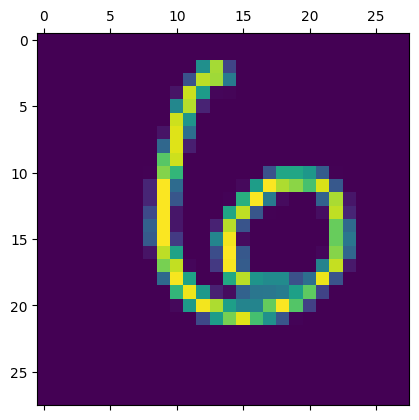

In [67]:
plt.matshow(X_test[100])

### We'll Save the model


In [47]:
model.save('mnist_model.h5')